In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import polars as pl


In [2]:
NPOB = 80
NGEN = 500
Pc = 0.6
Pm = 0.7
C = 0.4
NRES = 10
NSAMPLE = 50
random_vector = None 

In [3]:
# reaf the data from the excel file
data = pd.read_excel('Datos TablaInversiones.xlsx')
data = data.dropna()
data = data.reset_index(drop=True)
# rename columns
data.columns = ["Empresa","Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
data

,Empresa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,IBM,-0.012546,0.045071,0.023199,0.009866,-0.034398,-0.034401,-0.044192,0.036618,0.010112,0.020807,-0.047942,0.046991
1,Nvidia,0.033244,-0.028766,-0.031818,-0.03166,-0.019576,0.002476,-0.006805,-0.020877,0.011185,-0.036051,-0.020786,-0.013364
2,Kellogs,-0.004393,0.028518,-0.030033,0.001423,0.009241,-0.045355,0.010754,-0.032948,-0.043495,0.044889,0.046563,0.03084
3,Microsoft,-0.019539,-0.040233,0.018423,-0.005985,-0.037796,-0.000482,-0.046561,0.040932,-0.024122,0.016252,-0.018829,0.002007
4,BP,0.004671,-0.031515,0.046958,0.027513,0.04395,0.039483,0.00979,0.042187,-0.041151,-0.030402,-0.045477,-0.017467
5,UPS,-0.011132,-0.022865,0.032874,-0.014325,-0.021907,0.00427,-0.035908,0.03022,-0.042545,0.048689,0.027224,-0.030128
6,Amazon,-0.049448,0.031546,0.020686,0.022901,0.027127,-0.042596,-0.014153,-0.038413,0.03631,0.01233,-0.01691,-0.043644
7,Intel,-0.018902,-0.017482,0.022961,0.013756,0.038721,-0.002779,-0.038041,0.021324,0.026079,0.006128,0.027097,-0.00062
8,Ford,0.002273,-0.007246,-0.047458,-0.039211,-0.046857,0.013641,-0.018564,0.000857,0.040757,-0.025071,-0.008962,0.025555
9,Exxon,-0.02712,-0.042302,-0.021025,-0.033878,0.04297,0.030812,0.01334,0.037146,0.030367,-0.031343,0.039256,0.003934


In [4]:
import plotly as py
import plotly.io as pio
import plotly.express as px

# plot every company performance in the year show them all in a plot
x = data.columns[1:]
y = data.iloc[0,1:]
#fig = px.line(x=x, y=y, title='Performance de las empresas del dataset')
fig = py.graph_objs.Figure()
# add title
fig.update_layout(title='Performance de las empresas del dataset')
for i in range(1, data.shape[0]):
    y = data.iloc[i,1:]
    fig.add_scatter(x=x, y=y, mode='lines', name=data.iloc[i,0])
fig.show()







In [5]:
ri_cache = {}

def ri(copañia):
    if copañia not in ri_cache:
        ri_cache[copañia] = data.loc[data["Empresa"] == copañia].iloc[0, 1:].sum()/12
    return ri_cache[copañia]
    #add the row of the company and divide by 12
    #return (data.loc[data["Empresa"] == copañia].iloc[0, 1:].sum())/12

ri("IBM")

0.0015987499999999993

In [6]:
def cromosoma():
    # generate a vector of 20 random numbers between 0 and 1 that sum 1
    np.random.seed()
    c = np.random.rand(20)
    c = c/sum(c)
    return c

In [7]:
def calcularRc(cromosoma):
    rc = 0
    for i in range(20):
        rc += cromosoma[i]*ri(data.iloc[i]["Empresa"])
    return rc

In [8]:
def calcularOi(i):
    resultado = 0
    for m in range(12):
        resultado += np.square(data.iloc[i][m+1] - ri(data.iloc[i]["Empresa"]))
    return np.sqrt(resultado/11)

calcularOi(1)

/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.02055088711422984

In [9]:
def calcularOc(cromosoma):
    resultado = 0
    for i in range(20):
        for j in range(20):
            resultado += cromosoma[i]*cromosoma[j]*calcularOi(i)*calcularOi(j)
    return np.sqrt(0.25 * resultado)

In [10]:
def ratioSharpe(cromosoma):
    rc = calcularRc(cromosoma)
    desv = calcularOc(cromosoma)
    return (rc - 0.003757)/desv

In [11]:
def ruleta(fitness_gen, fitness_total, Pm):
  """
  Función que decide si mutar un gen usando la ruleta.

  Args:
    fitness_gen: Fitness del gen a evaluar.
    fitness_total: Fitness total del cromosoma.
    Pm: Probabilidad de mutación individual.

  Returns:
    True si el gen debe mutarse, False en caso contrario.
  """
  fitness_relativo = fitness_gen / fitness_total
  r = np.random.random()

  # Aplicar ruleta
  if r < fitness_relativo * Pm:
    return True
  else:
    return False

In [12]:
def ruletaEncruzamiento(fitness_gen, fitness_total, Pc):
  """
  Función que decide si cruzar un gen usando la ruleta.

  Args:
    fitness_gen: Fitness del gen a evaluar.
    fitness_total: Fitness total del cromosoma.
    Pc: Probabilidad de cruzamiento.

  Returns:
    True si el gen debe cruzarse, False en caso contrario.
  """
  fitness_relativo = fitness_gen / fitness_total
  r = np.random.random()

  # Aplicar ruleta
  if r < fitness_relativo * Pc:
    return True
  else:
    return False

In [13]:
def mutacion(cromosomaProcesado):
    for gen in range(len(cromosomaProcesado)):
        # Cambiar a el metodo de la ruleta
        #if ruleta(gen, fitness, Pm):
        if np.random.rand() < Pm:
            # generate a random number between 0 and 1
            nuevoGen = (np.random.rand() - 0.5) * C
            if nuevoGen < 0:
                nuevoGen = 0
            cromosomaProcesado[gen] = nuevoGen
            del nuevoGen

    
    return (cromosomaProcesado/sum(cromosomaProcesado))

In [14]:
def entrecruzamiento(cromosoma1, cromosoma2):
    # generate a random number between 0 and 1
    #if metodoRuleta(cromosoma1, Pc):
    r = np.random.random()
    if r < Pc:
        # generate a random number between 0 and 20
        punto = np.random.randint(20)
        # generate two new chromosomes
        cromosoma1 = np.concatenate((cromosoma1[:punto], cromosoma2[punto:]))
        cromosoma2 = np.concatenate((cromosoma2[:punto], cromosoma1[punto:]))

        # if there is a negative number, change it to 0
        cromosoma1[cromosoma1 < 0] = 0
        cromosoma2[cromosoma2 < 0] = 0
        cromosoma1 = cromosoma1/sum(cromosoma1)
        cromosoma2 = cromosoma2/sum(cromosoma2)
    return cromosoma1, cromosoma2

In [15]:
def consensus_chromosome(df):
  """
  Calculates the consensus chromosome by averaging values at each gene position.

  Args:
      df (pandas.DataFrame): DataFrame containing chromosomes

  Returns:
      list: The consensus chromosome
  """
  consensus = []
  for col in df.columns:
    if col != "Fitness":  # Exclude the fitness column
      consensus.append(df[col].mean())
  return consensus

In [16]:
def seleccionarHijos(df, fraccion):
    cromosomas = []
    fitness = []

    for _ in range(int(fraccion/2)):
        cromosoma1 = None
        cromosoma2 = None
        r = np.random.random()
        for i in range(df.shape[0]):
            if r < df["Probabilidad Acumulada"][i]:
                cromosoma1 = df["Cromosoma"][i]
                break
        r = np.random.random()
        for i in range(df.shape[0]):
            if r < df["Probabilidad Acumulada"][i]:
                cromosoma2 = df["Cromosoma"][i]
                break

        # aplicar entrecruzamiento
        cromosoma1, cromosoma2 = entrecruzamiento(cromosoma1, cromosoma2)

        cromosoma1 = mutacion(cromosoma1)
        cromosoma2 = mutacion(cromosoma2)
        finess1 = ratioSharpe(cromosoma1)
        finess2 = ratioSharpe(cromosoma2)
        cromosomas.append(cromosoma1)
        cromosomas.append(cromosoma2)
        fitness.append(finess1)
        fitness.append(finess2)
        del cromosoma1, cromosoma2, finess1, finess2

    return cromosomas, fitness

Empezar con el entrenamiento

In [17]:
# generate a random population

poblacion = []
for i in range(NPOB):
    poblacion.append(cromosoma())

# calculate the fitness of the population
fitness = []
for i in range(NPOB):
    fitness.append(ratioSharpe(poblacion[i]))


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [18]:
# save to pandas dataframe
df = pd.DataFrame({"Cromosoma": poblacion, "Fitness": fitness})
df

,Cromosoma,Fitness
0,"[0.012351848857483224, 0.06573742401494566, 0....",-0.402548
1,"[0.017610408848660882, 0.04016485523719883, 0....",-0.426470
2,"[0.08882974788219702, 0.05087134434254781, 0.0...",-0.427139
3,"[0.10025346470165804, 0.04059499141227071, 0.1...",-0.426937
4,"[0.09475425857656546, 0.06521196980138423, 0.0...",-0.347356
...,...,...
75,"[0.08211645018613097, 0.00864728312009002, 0.0...",-0.404886
76,"[0.08287916687556243, 0.03488817242290259, 0.0...",-0.361088
77,"[0.015876176080316735, 0.06881719050621471, 0....",-0.525950
78,"[0.030362281462947602, 0.06522245559182954, 0....",-0.454353


In [20]:
print("Comenzando algoritmo genético con los parametros:")
print(f"NPOB: {NPOB}")
print(f"NGEN: {NGEN}")
print(f"Pc: {Pc}")
print(f"Pm: {Pm}")
print(f"C: {C}")
BESTc = None
BESTf = None
BESTPorcentaje = None
CONSf = None
cromosomaConsenso = None
historicoBestFitness = []


for v in range(NGEN):
    df = df.sort_values(by="Fitness", ascending=False, ignore_index=True)
    if BESTf is None or BESTf < df["Fitness"][0]:
        BESTf = df["Fitness"][0]
        BESTc = df["Cromosoma"][0]

    historicoBestFitness.append(BESTf)
    
    BESTPorcentaje = (BESTf / df["Fitness"].mean()) * 100
    #CONSf = ratioSharpe(consensus_chromosome(df.copy()))  # Calculate fitness of consensus chromosome


        
    

    nextGen = df.head(int(NPOB*0.2)).copy()
    df = df[int(NPOB*0.2):]
    df = df.reset_index(drop=True)


    probabilidadSeleccion = []
    for i in range(nextGen.shape[0]):
        probabilidadSeleccion.append(nextGen["Fitness"][i]/sum(nextGen["Fitness"]))
    probabilidadAcumulada = []
    suma = 0
    for i in range(nextGen.shape[0]):
        suma += probabilidadSeleccion[i]
        probabilidadAcumulada.append(suma)

    #nextGen = nextGen.with_columns([pl.Series("Probabilidad", probabilidadSeleccion), pl.Series("Probabilidad Acumulada", probabilidadAcumulada)])
    nextGen["Probabilidad"] = probabilidadSeleccion
    nextGen["Probabilidad Acumulada"] = probabilidadAcumulada
    del probabilidadAcumulada, probabilidadSeleccion

    probabilidadSeleccion = []
    for i in range(df.shape[0]):
        probabilidadSeleccion.append(df["Fitness"][i]/sum(df["Fitness"]))
    probabilidadAcumulada = []
    suma = 0
    for i in range(df.shape[0]):
        suma += probabilidadSeleccion[i]
        probabilidadAcumulada.append(suma)

    #df = df.with_columns([pl.Series("Probabilidad", probabilidadSeleccion), pl.Series("Probabilidad Acumulada", probabilidadAcumulada)])
    df["Probabilidad"] = probabilidadSeleccion
    df["Probabilidad Acumulada"] = probabilidadAcumulada
    del probabilidadAcumulada, probabilidadSeleccion


    hijosNextGen, fitnessNextGen = seleccionarHijos(nextGen, NPOB/2)
    hijosDf, fitnessDf = seleccionarHijos(df, NPOB/3)

    hijos = hijosNextGen + hijosDf
    fitness = fitnessNextGen + fitnessDf

    nextGen.drop(columns=["Probabilidad", "Probabilidad Acumulada"], inplace=True)


    newDf = pd.DataFrame({"Cromosoma": hijos, "Fitness": fitness})
    del df

    df = pd.concat([nextGen, newDf], ignore_index=True)
    print(f"Generacion {v} completada")
    print("Hash de la generacion:", hash(df.to_string()))


    del hijos, fitness, hijosNextGen, fitnessNextGen, hijosDf, fitnessDf
    del nextGen, newDf
    if v % NRES == 0:
        print(f"Generacion {v} completada")
        print("Mejor cromosoma:", BESTf, " BESTPorcentaje:", BESTPorcentaje)
        print("Cromosoma consenso:", CONSf)
        print("")
        #df.write_avro(f"generacion_{i}.avro")
    if v % NSAMPLE == 0:
        print(f"Generacion {v} completada")
        print("Mejor cromosoma:", BESTf, " en BESTPorcentaje:", BESTPorcentaje)
        print("Cromosoma consenso:", CONSf)
        print("Muestreo del 20% de la población")
        print(df.head(int(NPOB*0.2)))

        

    
        
    


print(f"Generacion {v} completada")
print("Mejor cromosoma:", BESTf, " en BESTPorcentaje:", BESTPorcentaje)
print("Cromosoma consenso:", CONSf)
print("Muestreo del 20% de la población")
print(df.head(int(NPOB*0.2)))



Comenzando algoritmo genético con los parametros:
NPOB: 80
NGEN: 500
Pc: 0.6
Pm: 0.7
C: 0.4


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Hash de la generacion: 3690747515148635513
Generacion 0 completada
Mejor cromosoma: -0.11508892329909264  BESTPorcentaje: 30.930155877742
Cromosoma consenso: None

Generacion 0 completada
Mejor cromosoma: -0.11508892329909264  en BESTPorcentaje: 30.930155877742
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.0753359120849816, 0.0, 0.0, 0.0, 0.0, 0.032... -0.115089
1   [0.07375500168309478, 0.0, 0.02323457623723984... -0.115426
2   [0.16859429300945644, 0.0, 0.1826109348808915,... -0.135155
3   [0.11088983363812335, 0.0, 0.1802291945004606,... -0.162257
4   [0.0, 0.17200682602178455, 0.1884240565589634,... -0.197119
5   [0.061462700534583005, 0.048216790272352705, 0... -0.200159
6   [0.0, 0.0, 0.0, 0.15628100263701744, 0.0282618... -0.219039
7   [0.031336575412656616, 0.024550408663439043, 0... -0.252907
8   [0.12760031760781718, 0.006318381337913272, 0.... -0.260275
9   [0.181511219

/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 1 completada
Hash de la generacion: 6528714156945383646


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 2 completada
Hash de la generacion: 2993269542969099616


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 3 completada
Hash de la generacion: -4463534219259217027


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 4 completada
Hash de la generacion: -1730650639099288025


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 5 completada
Hash de la generacion: -305175242146146142


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 6 completada
Hash de la generacion: -5645600459704889735


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 7 completada
Hash de la generacion: -2054662141023814205


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 8 completada
Hash de la generacion: -7597702539241740323


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 9 completada
Hash de la generacion: 7255770396173945836


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 10 completada
Hash de la generacion: -636754486984737442
Generacion 10 completada
Mejor cromosoma: 0.006851892229920477  BESTPorcentaje: -2.3209029236467784
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 11 completada
Hash de la generacion: -4504667169214469818


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 12 completada
Hash de la generacion: -8112460849871055292


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 13 completada
Hash de la generacion: -1702440645250020333


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 14 completada
Hash de la generacion: 4711255032190904304


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 15 completada
Hash de la generacion: 8214095320540734258


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 16 completada
Hash de la generacion: 3744058090575810451


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 17 completada
Hash de la generacion: -833671710433177019


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 18 completada
Hash de la generacion: -7325814155129492914


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 19 completada
Hash de la generacion: 4396491995306121943


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 20 completada
Hash de la generacion: -7663684862895599272
Generacion 20 completada
Mejor cromosoma: 0.0352626852304132  BESTPorcentaje: -10.51338122265072
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 21 completada
Hash de la generacion: -6580889184000555909


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 22 completada
Hash de la generacion: 4566870898162279015


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 23 completada
Hash de la generacion: -9207440525721224910


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 24 completada
Hash de la generacion: 6148256775175809836


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 25 completada
Hash de la generacion: 5833576293950695939


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 26 completada
Hash de la generacion: 7466405899579361693


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 27 completada
Hash de la generacion: 7109523847702740797


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 28 completada
Hash de la generacion: -183481951612282841


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 29 completada
Hash de la generacion: 4985337713736030879


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 30 completada
Hash de la generacion: -2318818437884095736
Generacion 30 completada
Mejor cromosoma: 0.0352626852304132  BESTPorcentaje: -10.782554162136964
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 31 completada
Hash de la generacion: -4418843342571057491


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 32 completada
Hash de la generacion: 2784156961354978814


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 33 completada
Hash de la generacion: 2899917622554671438


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 34 completada
Hash de la generacion: -1510274203247277055


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 35 completada
Hash de la generacion: 2020534652105855654


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 36 completada
Hash de la generacion: 1008672796399690914


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 37 completada
Hash de la generacion: 3026246456589066924


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 38 completada
Hash de la generacion: 7793128037456817773


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 39 completada
Hash de la generacion: 6447296881182340441


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 40 completada
Hash de la generacion: 3049166439392842514
Generacion 40 completada
Mejor cromosoma: 0.0352626852304132  BESTPorcentaje: -11.30853716337053
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 41 completada
Hash de la generacion: -6269899993945879369


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 42 completada
Hash de la generacion: -1678261520551865556


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 43 completada
Hash de la generacion: 890306109673067840


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 44 completada
Hash de la generacion: 7835745148729936888


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 45 completada
Hash de la generacion: 1576893361537366518


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 46 completada
Hash de la generacion: -8541361893866821800


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 47 completada
Hash de la generacion: -4706617259842027033


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 48 completada
Hash de la generacion: 3163472408703259609


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 49 completada
Hash de la generacion: -2788579919553382738


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 50 completada
Hash de la generacion: -8741248881575384396
Generacion 50 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -47.615974054545624
Cromosoma consenso: None

Generacion 50 completada
Mejor cromosoma: 0.14228744976189964  en BESTPorcentaje: -47.615974054545624
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.19827140231280158, 0.0, 0.0, 0.151574989671...  0.142287
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.06204027021464973,...  0.085987
2   [0.0, 0.14165738713906836, 0.0, 0.0, 0.1545809...  0.048963
3   [0.0, 0.0, 0.1233490175921443, 0.0267792177936...  0.042054
4   [0.026539825364599912, 0.0, 0.0, 0.0, 0.0, 0.0...  0.041132
5   [0.03073867425729775, 0.0, 0.0, 0.021594641506...  0.035263
6   [0.02846360814520037, 0.16465504912061577, 0.0...  0.023033
7   [0.030821644802396176, 0.12380500316824304, 0....  0.022965
8   [0.008081399301251402, 0.0, 0.0, 0.0, 0.0, 0.0...  0.021702
9   [0

/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 51 completada
Hash de la generacion: -2895163113536297732


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 52 completada
Hash de la generacion: -2923450024324665172


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 53 completada
Hash de la generacion: 2040618619412118402


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 54 completada
Hash de la generacion: 2347979448717301171


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 55 completada
Hash de la generacion: 3520884109905205010


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 56 completada
Hash de la generacion: -6428768632277588404


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 57 completada
Hash de la generacion: -4078013164634162675


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 58 completada
Hash de la generacion: -4829367771496398256


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 59 completada
Hash de la generacion: 5802912875385438880


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 60 completada
Hash de la generacion: 8945115854527825177
Generacion 60 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -43.682129045429114
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 61 completada
Hash de la generacion: 91189331399695066


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 62 completada
Hash de la generacion: 1564146434157464589


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 63 completada
Hash de la generacion: 829409116232198044


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 64 completada
Hash de la generacion: -8584301169701812987


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 65 completada
Hash de la generacion: -2792735756417375054


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 66 completada
Hash de la generacion: 384200053538005611


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 67 completada
Hash de la generacion: -657899770976354506


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 68 completada
Hash de la generacion: -1959814858294607183


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 69 completada
Hash de la generacion: 2196347315838692128


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 70 completada
Hash de la generacion: -5961709319728072718
Generacion 70 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -47.94867570134434
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 71 completada
Hash de la generacion: -6696552668693028822


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 72 completada
Hash de la generacion: 2156948087951755963


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 73 completada
Hash de la generacion: 1344070310119125228


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 74 completada
Hash de la generacion: 8797732241121568862


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 75 completada
Hash de la generacion: 1425249020950266523


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 76 completada
Hash de la generacion: 6433895053703958326


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 77 completada
Hash de la generacion: 3541201193462426779


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 78 completada
Hash de la generacion: -4575331945556289432


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 79 completada
Hash de la generacion: -747891426899373544


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 80 completada
Hash de la generacion: 8966477823244909982
Generacion 80 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -44.772397710931365
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 81 completada
Hash de la generacion: -1533757160632830115


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 82 completada
Hash de la generacion: 7529943991571107189


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 83 completada
Hash de la generacion: -5536670246995929491


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 84 completada
Hash de la generacion: -2809062826765017278


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 85 completada
Hash de la generacion: 4549959138373452705


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 86 completada
Hash de la generacion: 834918742138372898


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 87 completada
Hash de la generacion: 2433545953177162031


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 88 completada
Hash de la generacion: 4023327436666685737


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 89 completada
Hash de la generacion: -2687363278715794759


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 90 completada
Hash de la generacion: 6728384393690692136
Generacion 90 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -46.724625320448524
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 91 completada
Hash de la generacion: 6355603438032219754


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 92 completada
Hash de la generacion: 3204230485450987021


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 93 completada
Hash de la generacion: 3194995532880265401


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 94 completada
Hash de la generacion: 6014988871172244456


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 95 completada
Hash de la generacion: -90170333112045445


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 96 completada
Hash de la generacion: 941871091702058000


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 97 completada
Hash de la generacion: 6850630301034893697


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 98 completada
Hash de la generacion: -8706699442959259792


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 99 completada
Hash de la generacion: -2945307930973607436


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 100 completada
Hash de la generacion: -1025949036744773960
Generacion 100 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -42.4804617045064
Cromosoma consenso: None

Generacion 100 completada
Mejor cromosoma: 0.14228744976189964  en BESTPorcentaje: -42.4804617045064
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.1524826831089059, 0.10098737627594319, 0.0,...  0.142287
1   [0.17749079626410968, 0.1759286366607493, 0.0,...  0.106817
2   [0.0, 0.0, 0.06907454660534605, 0.126118839036...  0.097207
3   [0.0, 0.0, 0.0, 0.08585511733978853, 0.0596111...  0.085987
4   [0.0, 0.0, 0.15550310959098335, 0.0, 0.0, 0.0,...  0.065301
5   [0.0, 0.14270702128554885, 0.0, 0.0, 0.1340039...  0.060529
6   [0.0, 0.0, 0.0, 0.16176958012750797, 0.0, 0.01...  0.058064
7   [0.18846953218570528, 0.0, 0.14854472497784138...  0.049645
8   [0.0, 0.0, 0.025993750737484556, 0.0, 0.100980...  0.048963
9   [0.

/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 101 completada
Hash de la generacion: -2333101406933987517


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 102 completada
Hash de la generacion: 3956522621736540345


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 103 completada
Hash de la generacion: -4047500379548370447


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 104 completada
Hash de la generacion: 1591383862826835805


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 105 completada
Hash de la generacion: -5019456435323177536


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 106 completada
Hash de la generacion: -4735110330247388352


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 107 completada
Hash de la generacion: -3035730056874142709


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 108 completada
Hash de la generacion: 1776332115542305654


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 109 completada
Hash de la generacion: 8564412446094895160


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 110 completada
Hash de la generacion: -8605507251049982769
Generacion 110 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -47.4094830635347
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 111 completada
Hash de la generacion: 150876792427975519


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 112 completada
Hash de la generacion: 1355248000422654664


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 113 completada
Hash de la generacion: -115343942070696827


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 114 completada
Hash de la generacion: 5911495804655078286


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 115 completada
Hash de la generacion: -8491173973907654254


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 116 completada
Hash de la generacion: -3971332604372951939


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 117 completada
Hash de la generacion: -1751894942937155462


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 118 completada
Hash de la generacion: -8932583073678130459


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 119 completada
Hash de la generacion: 3520787646360162528


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 120 completada
Hash de la generacion: -9013332667653690686
Generacion 120 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -41.50400520757145
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 121 completada
Hash de la generacion: -2860710255699803319


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 122 completada
Hash de la generacion: 8102987193598009816


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 123 completada
Hash de la generacion: -983312140229715664


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 124 completada
Hash de la generacion: -14288490292257877


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 125 completada
Hash de la generacion: 7635033801225991323


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 126 completada
Hash de la generacion: -6059417828528292909


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 127 completada
Hash de la generacion: -1263485917879144641


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 128 completada
Hash de la generacion: -1161318393362539218


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 129 completada
Hash de la generacion: -1568585319711812562


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 130 completada
Hash de la generacion: 7625209523241844925
Generacion 130 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -49.78741276919527
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 131 completada
Hash de la generacion: -8665978506900406325


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 132 completada
Hash de la generacion: 7241338746076861349


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 133 completada
Hash de la generacion: -2220579088403453698


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 134 completada
Hash de la generacion: -930223654450876637


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 135 completada
Hash de la generacion: -9028954863894383305


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 136 completada
Hash de la generacion: 52891394286971458


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 137 completada
Hash de la generacion: 967942931270469950


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 138 completada
Hash de la generacion: -4248262571879599537


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 139 completada
Hash de la generacion: 8678203853048576664


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 140 completada
Hash de la generacion: 5667246265325544980
Generacion 140 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -47.77887102535776
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 141 completada
Hash de la generacion: -3928110400521349177


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 142 completada
Hash de la generacion: 342018505499670977


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 143 completada
Hash de la generacion: -5576800250611660313


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 144 completada
Hash de la generacion: -1326354113179730102


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 145 completada
Hash de la generacion: 7973663891078662466


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 146 completada
Hash de la generacion: -4841970966003210240


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 147 completada
Hash de la generacion: 5844071488609682672


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 148 completada
Hash de la generacion: -2014671335662350081


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 149 completada
Hash de la generacion: 5975498375395970620


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 150 completada
Hash de la generacion: -1614055824121386093
Generacion 150 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -44.767355214641675
Cromosoma consenso: None

Generacion 150 completada
Mejor cromosoma: 0.14228744976189964  en BESTPorcentaje: -44.767355214641675
Cromosoma consenso: None
Muestreo del 20% de la población
                                            Cromosoma   Fitness
0   [0.08505503542366206, 0.09208996442587516, 0.0...  0.142287
1   [0.16631464915740418, 0.058142733701141314, 0....  0.137663
2   [0.04506717090577901, 0.0, 0.0, 0.0, 0.0, 0.10...  0.116310
3   [0.15669228621640263, 0.0408241467330333, 0.0,...  0.106817
4   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1330026403225...  0.097207
5   [0.0, 0.18605942333001457, 0.15905342371448944...  0.085987
6   [0.07155524911056776, 0.0, 0.0, 0.153262272802...  0.074350
7   [0.0, 0.09006863497916706, 0.03150348617899273...  0.065301
8   [0.17672238575064858, 0.1291883731462963, 0.0,...  0.060529
9  

/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 151 completada
Hash de la generacion: 8548583686046395817


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 152 completada
Hash de la generacion: 8460025972214871587


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 153 completada
Hash de la generacion: 9180642798473494939


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 154 completada
Hash de la generacion: 5796099094200946029


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 155 completada
Hash de la generacion: 2955744526272721552


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 156 completada
Hash de la generacion: -7596511740107916967


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 157 completada
Hash de la generacion: 7964058841982016538


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 158 completada
Hash de la generacion: -9107910648509051830


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 159 completada
Hash de la generacion: 4588663754243195862


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 160 completada
Hash de la generacion: -221590050195379419
Generacion 160 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -44.21639037705141
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 161 completada
Hash de la generacion: -1364313955778326906


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 162 completada
Hash de la generacion: -587812328329297117


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 163 completada
Hash de la generacion: -4017960681364041313


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 164 completada
Hash de la generacion: -4769198756365015615


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 165 completada
Hash de la generacion: 1006751288974668808


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 166 completada
Hash de la generacion: 2195736765226659227


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 167 completada
Hash de la generacion: -2934392586823922646


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 168 completada
Hash de la generacion: -8310417152120240518


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 169 completada
Hash de la generacion: 3738983037686419295


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 170 completada
Hash de la generacion: 3884688878526500641
Generacion 170 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -45.51809685068075
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 171 completada
Hash de la generacion: -9025062231473693437


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 172 completada
Hash de la generacion: 5644102298157382725


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 173 completada
Hash de la generacion: 909440938396549241


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 174 completada
Hash de la generacion: 1592972679616013302


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 175 completada
Hash de la generacion: 4050308220900699658


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 176 completada
Hash de la generacion: 5554805157172603180


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 177 completada
Hash de la generacion: 684355097925591658


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 178 completada
Hash de la generacion: -5203206251291177639


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 179 completada
Hash de la generacion: 6705747797808458290


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 180 completada
Hash de la generacion: 2144553262275560186
Generacion 180 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -49.17530527569392
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 181 completada
Hash de la generacion: 8345565607983710491


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 182 completada
Hash de la generacion: 6611187773265402396


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 183 completada
Hash de la generacion: -1829094278726566348


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 184 completada
Hash de la generacion: 8728126744569312282


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 185 completada
Hash de la generacion: -1407301172964963630


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 186 completada
Hash de la generacion: -4826681463442357677


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 187 completada
Hash de la generacion: -923246398989948278


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 188 completada
Hash de la generacion: -4106345271574478484


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 189 completada
Hash de la generacion: 2818240041356373132


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 190 completada
Hash de la generacion: 1771583623936041421
Generacion 190 completada
Mejor cromosoma: 0.14228744976189964  BESTPorcentaje: -49.87249902995808
Cromosoma consenso: None



/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 191 completada
Hash de la generacion: -6674973393374879310


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 192 completada
Hash de la generacion: 5665717889366461565


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 193 completada
Hash de la generacion: 4275412347953600188


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 194 completada
Hash de la generacion: 3416103564413543713


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 195 completada
Hash de la generacion: -4022772418873382567


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 196 completada
Hash de la generacion: 1736897518766988130


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 197 completada
Hash de la generacion: -2480467752384336048


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 198 completada
Hash de la generacion: 499617098465416046


/tmp/ipykernel_4146/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
df

,Cromosoma,Fitness,Probabilidad,Probabilidad Acumulada
0,"[0.09218274041177879, 0.0, 0.149248632833659, ...",-0.008466,0.000247,0.000247
1,"[0.10985356699318675, 0.0, 0.0, 0.0, 0.0, 0.0,...",-0.080595,0.002353,0.002601
2,"[0.1449015821548702, 0.0, 0.0, 0.0899542384397...",-0.118462,0.003459,0.006060
3,"[0.17222222425832465, 0.0, 0.08345650613683687...",-0.130189,0.003801,0.009861
4,"[0.11998929909613444, 0.0, 0.24202688212134876...",-0.152592,0.004456,0.014317
...,...,...,...,...
77,"[0.0027713028978192575, 0.15407327736641227, 0...",-0.670034,0.019564,0.917176
78,"[0.0, 0.0705676078194667, 0.0, 0.0337936016199...",-0.672459,0.019635,0.936811
79,"[0.0, 0.16579938347784737, 0.0, 0.099697450681...",-0.673155,0.019656,0.956467
80,"[0.12994372559659442, 0.22974399910323642, 0.0...",-0.727194,0.021234,0.977700


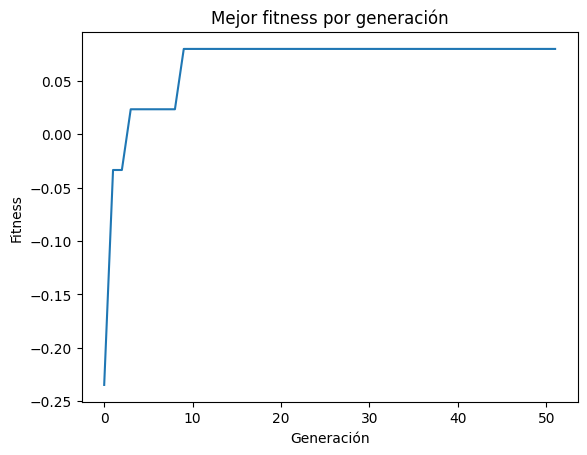

In [ ]:
# graph the best fitness
plt.plot(historicoBestFitness)
plt.title("Mejor fitness por generación")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.show()


In [ ]:
# get the position of the genes that are not 0
genes = []
for i in range(20):
    if BESTc[i] != 0:
        print(data.iloc[i]["Empresa"], BESTc[i])

IBM 0.03244976838814506
Nvidia 0.198083962036853
Kellogs 0.1072705437607851
Microsoft 0.06381842593027778
BP 0.025475488344081934
Toyota 0.19236463698044415
Ikea 0.0986568938341287
Bayer 0.08661410120750782
Netflix 0.14826483561672874
L'Oréal 0.06075993120505374
Airbus 0.14305863553024115


In [ ]:
# hash of df
hash(df.to_string())

-144637045018850894